In [252]:
# imports
import pandas as pd
import numpy as np
import sys
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import precision_recall_fscore_support
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report

In [193]:
# Read data from CSV file 
df_excel=pd.read_excel('customer_problems.xlsx')

In [194]:
df=df_excel
df.head()

,ROW,NOTIFYING_CHANNEL,PROBLEM_ID,CFS_ID,CFS_CODE,CFS_NAME,CFS_DESC,CFS_PLAN_ID,CFS_PLAN_CODE,CFS_PLAN,...,OPENING_DAY,CLOSING_TIME,DURATION_MIN,TEAM_CODE,TT_CENTRAL_ID,DIRECTORATE_CODE,DIRECTORATE,CITY_CODE,CITY,REGION
0,1,OLO,2021042400084814317,228,ADSL,ADSL,ADSL,82,DSL_FTTB,DSL FTTB,...,SATURDAY,"26/04/2021 18:05:29,348000",3078,416FSAHA00001,MERKEZ-B-6,NaN,NaN,1106133,ADIYAMAN,DİYARBAKIR BÖLGE MÜDÜRLÜĞÜ
1,2,OLO,2021042400084802200,231,VDSL2,VDSL2,VDSL2,152,DSL_FTTB,DSL FTTB,...,SATURDAY,"25/04/2021 15:31:01,497000",1468,232FSAHA90012,YEŞİLYURT-90,1105730.0,BAHÇELİEVLER TELEKOM (İZMİR),1008,İZMİR,İZMİR BÖLGE MÜDÜRLÜĞÜ
2,3,OLO,2021042400084815390,230,NDSL,NDSL,NDSL,146,DSL_BAKIR,DSL BAKIR,...,SATURDAY,"11/05/2021 09:52:24,735000",24068,212FSAHA77061,ESENYURT,1106521.0,AVCILAR TELEKOM,1007,İSTANBUL AVR,İSTANBUL BÖLGE MÜDÜRLÜĞÜ
3,4,OLO,2021042400084803066,232,NVDSL,NVDSL,NVDSL,157,DSL_FTTC,DSL FTTC,...,SATURDAY,"27/04/2021 11:00:35,967000",3974,232FSAHA17104,HARMANDALI-171,1105737.0,ÇİĞLİ TELEKOM,1008,İZMİR,İZMİR BÖLGE MÜDÜRLÜĞÜ
4,5,OLO,2021042400084815698,232,NVDSL,NVDSL,NVDSL,153,DSL_FTTB,DSL FTTB,...,SATURDAY,"26/04/2021 01:31:02,835000",1927,312SAHA26302,SİNCAN-17,1105488.0,SİNCAN TELEKOM,1001,ANKARA,ANKARA BÖLGE MÜDÜRLÜĞÜ


In [195]:
df.shape

(69148, 31)

In [196]:
# find null values
df.isnull().sum()

ROW                      0
NOTIFYING_CHANNEL        0
PROBLEM_ID               0
CFS_ID                   0
CFS_CODE                 0
CFS_NAME                 0
CFS_DESC                 0
CFS_PLAN_ID              0
CFS_PLAN_CODE            0
CFS_PLAN                 0
WORK_TYPE_ID             0
WORK_TYPE_CODE           0
WORK_TYPE                0
RFS_TIP_ID               0
RFS_TYPE_CODE            0
RFS_TYPE                 0
COMPLAINT_ID             0
COMPLAINT_TYPE_ID        0
COMPLAINT_TYPE           0
PRIORITY              5895
OPENING_TIME             0
OPENING_DAY              0
CLOSING_TIME             0
DURATION_MIN             0
TEAM_CODE              358
TT_CENTRAL_ID            0
DIRECTORATE_CODE     19399
DIRECTORATE          19399
CITY_CODE                0
CITY                     0
REGION                   0
dtype: int64

In [197]:
# set min priority (5) for null values in PRIORITY column
df.PRIORITY.fillna(value=5, inplace=True)

In [198]:
# convert to numeric
df['PRIORITY']= pd.to_numeric(df['PRIORITY'])
df[['PRIORITY']]

,PRIORITY
0,2.0
1,2.0
2,2.0
3,5.0
4,3.0
...,...
69143,5.0
69144,1.0
69145,1.0
69146,5.0


In [199]:
# there is no directorate in small cities so if directorate code is null, we can set city code to directorate code
df.DIRECTORATE_CODE.fillna(value=df.CITY_CODE, inplace=True)
df.DIRECTORATE.fillna(value=df.CITY, inplace=True)

In [200]:
# find null values
df.isnull().sum()

ROW                    0
NOTIFYING_CHANNEL      0
PROBLEM_ID             0
CFS_ID                 0
CFS_CODE               0
CFS_NAME               0
CFS_DESC               0
CFS_PLAN_ID            0
CFS_PLAN_CODE          0
CFS_PLAN               0
WORK_TYPE_ID           0
WORK_TYPE_CODE         0
WORK_TYPE              0
RFS_TIP_ID             0
RFS_TYPE_CODE          0
RFS_TYPE               0
COMPLAINT_ID           0
COMPLAINT_TYPE_ID      0
COMPLAINT_TYPE         0
PRIORITY               0
OPENING_TIME           0
OPENING_DAY            0
CLOSING_TIME           0
DURATION_MIN           0
TEAM_CODE            358
TT_CENTRAL_ID          0
DIRECTORATE_CODE       0
DIRECTORATE            0
CITY_CODE              0
CITY                   0
REGION                 0
dtype: int64

In [201]:
# only TEAM_CODE has null values and the count is negligeble, drop if TIME_CODE is null, because we cant set a value
# 358 rows deleted
df.dropna(inplace=True) 
df.isnull().sum()

ROW                  0
NOTIFYING_CHANNEL    0
PROBLEM_ID           0
CFS_ID               0
CFS_CODE             0
CFS_NAME             0
CFS_DESC             0
CFS_PLAN_ID          0
CFS_PLAN_CODE        0
CFS_PLAN             0
WORK_TYPE_ID         0
WORK_TYPE_CODE       0
WORK_TYPE            0
RFS_TIP_ID           0
RFS_TYPE_CODE        0
RFS_TYPE             0
COMPLAINT_ID         0
COMPLAINT_TYPE_ID    0
COMPLAINT_TYPE       0
PRIORITY             0
OPENING_TIME         0
OPENING_DAY          0
CLOSING_TIME         0
DURATION_MIN         0
TEAM_CODE            0
TT_CENTRAL_ID        0
DIRECTORATE_CODE     0
DIRECTORATE          0
CITY_CODE            0
CITY                 0
REGION               0
dtype: int64

In [202]:
df.head()

,ROW,NOTIFYING_CHANNEL,PROBLEM_ID,CFS_ID,CFS_CODE,CFS_NAME,CFS_DESC,CFS_PLAN_ID,CFS_PLAN_CODE,CFS_PLAN,...,OPENING_DAY,CLOSING_TIME,DURATION_MIN,TEAM_CODE,TT_CENTRAL_ID,DIRECTORATE_CODE,DIRECTORATE,CITY_CODE,CITY,REGION
0,1,OLO,2021042400084814317,228,ADSL,ADSL,ADSL,82,DSL_FTTB,DSL FTTB,...,SATURDAY,"26/04/2021 18:05:29,348000",3078,416FSAHA00001,MERKEZ-B-6,1106133.0,ADIYAMAN,1106133,ADIYAMAN,DİYARBAKIR BÖLGE MÜDÜRLÜĞÜ
1,2,OLO,2021042400084802200,231,VDSL2,VDSL2,VDSL2,152,DSL_FTTB,DSL FTTB,...,SATURDAY,"25/04/2021 15:31:01,497000",1468,232FSAHA90012,YEŞİLYURT-90,1105730.0,BAHÇELİEVLER TELEKOM (İZMİR),1008,İZMİR,İZMİR BÖLGE MÜDÜRLÜĞÜ
2,3,OLO,2021042400084815390,230,NDSL,NDSL,NDSL,146,DSL_BAKIR,DSL BAKIR,...,SATURDAY,"11/05/2021 09:52:24,735000",24068,212FSAHA77061,ESENYURT,1106521.0,AVCILAR TELEKOM,1007,İSTANBUL AVR,İSTANBUL BÖLGE MÜDÜRLÜĞÜ
3,4,OLO,2021042400084803066,232,NVDSL,NVDSL,NVDSL,157,DSL_FTTC,DSL FTTC,...,SATURDAY,"27/04/2021 11:00:35,967000",3974,232FSAHA17104,HARMANDALI-171,1105737.0,ÇİĞLİ TELEKOM,1008,İZMİR,İZMİR BÖLGE MÜDÜRLÜĞÜ
4,5,OLO,2021042400084815698,232,NVDSL,NVDSL,NVDSL,153,DSL_FTTB,DSL FTTB,...,SATURDAY,"26/04/2021 01:31:02,835000",1927,312SAHA26302,SİNCAN-17,1105488.0,SİNCAN TELEKOM,1001,ANKARA,ANKARA BÖLGE MÜDÜRLÜĞÜ


In [203]:
# drop duplicates rows
# but no dublicate
df.drop_duplicates()
df.shape

(68790, 31)

In [204]:
# there is only 1 channel and work type code so we cannot use them
print(df['NOTIFYING_CHANNEL'].value_counts())
print(df['WORK_TYPE_CODE'].value_counts())

OLO    68790
Name: NOTIFYING_CHANNEL, dtype: int64
ISLAH    68790
Name: WORK_TYPE_CODE, dtype: int64


In [205]:
# convert openning time to shift period
# add shift period column with default value = 0
df['SHIFT_PERIOD'] = 0;

In [206]:
# convert string to datetime
df['OPENING_TIME']= pd.to_datetime(df['OPENING_TIME'])

array([[<AxesSubplot:title={'center':'SHIFT_PERIOD'}>]], dtype=object)

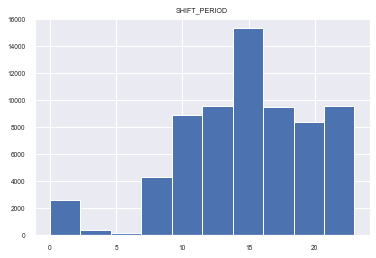

In [207]:
# set time, day, month from OPENING_DATE
df[['SHIFT_PERIOD']]= df.OPENING_TIME.dt.hour
df[['HOUR']]= df.OPENING_TIME.dt.hour
df[['DAY']]= df.OPENING_TIME.dt.dayofweek + 1
df[['MONTH']]= df.OPENING_TIME.dt.month
df.hist(column='SHIFT_PERIOD')

In [208]:
# convert  time to shift period category
# 3 category; 
# 1.Shift: 00:00-8:00
# 2.Shift: 8:00-16:00
# 3.Shift: 16:00-00:00
df['SHIFT_PERIOD'] = np.where((df.SHIFT_PERIOD < 9), 1, df.SHIFT_PERIOD)
df['SHIFT_PERIOD'] = np.where((df.SHIFT_PERIOD > 8) & (df.SHIFT_PERIOD < 17), 2, df.SHIFT_PERIOD)
df['SHIFT_PERIOD'] = np.where((df.SHIFT_PERIOD > 16) & (df.SHIFT_PERIOD < 24), 3, df.SHIFT_PERIOD)


2    36993
3    27500
1     4297
Name: SHIFT_PERIOD, dtype: int64


array([[<AxesSubplot:title={'center':'SHIFT_PERIOD'}>]], dtype=object)

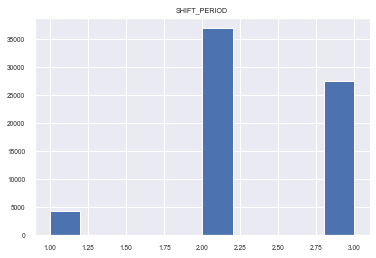

In [209]:
print(df['SHIFT_PERIOD'].value_counts())
df.hist(column='SHIFT_PERIOD')

In [210]:
# convert solution duration (duration_min) to 5 category
# max %40 accuracy with RFC for 5 category, so try for 2 category according to 2 days SLA 
# max %10 accuracy for duration estimation
# 1.Category: 0-1440 minutes, 0-1 day
# 2.Category: 2161-2880 minutes, 1-2 day, SLA threshold is 2 day
# 3.Category: 2881-4320 minutes, 2-3 day
# 4.Category: 4321-5760 minutes, 3-4 day
# 5.Category: >5760 minutes, > 4 day

# add duration_category column with defaul value = 0
df['DURATION_CATEGORY'] = 0
df['DURATION_CATEGORY'] = np.where((df.DURATION_MIN > 2880), 1, df.DURATION_CATEGORY) # more than 2 days, customer SLA treshold

#df['DURATION_CATEGORY'] = np.where((df.DURATION_MIN < 1441), 1, df.DURATION_CATEGORY)
#df['DURATION_CATEGORY'] = np.where((df.DURATION_MIN > 1440) & (df.DURATION_MIN < 2881), 2, df.DURATION_CATEGORY)
#df['DURATION_CATEGORY'] = np.where((df.DURATION_MIN > 2880) & (df.DURATION_MIN < 4321), 3, df.DURATION_CATEGORY)
#df['DURATION_CATEGORY'] = np.where((df.DURATION_MIN > 4320) & (df.DURATION_MIN < 5761), 4, df.DURATION_CATEGORY)
#df['DURATION_CATEGORY'] = np.where((df.DURATION_MIN > 5760), 5, df.DURATION_CATEGORY)

0    48951
1    19839
Name: DURATION_CATEGORY, dtype: int64


array([[<AxesSubplot:title={'center':'DURATION_CATEGORY'}>]], dtype=object)

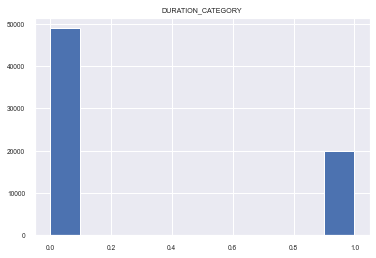

In [211]:
print(df['DURATION_CATEGORY'].value_counts())
df.hist(column='DURATION_CATEGORY')

In [212]:
# solution for RecursionError: maximum recursion depth exceeded
sys.setrecursionlimit(3000)
df['OPENING_DAY'] = df['OPENING_DAY'].apply(str)

In [213]:
# delete spaces
df[['OPENING_DAY']] = df[['OPENING_DAY']].replace(to_replace=' ', value='', regex=True)

In [214]:
# convert CFS_CODE, CFS_PLAN_CODE, OPENING_DAY to one hot encoding
print(df['CFS_CODE'].value_counts())
print(df['CFS_PLAN_CODE'].value_counts())
print(df['OPENING_DAY'].value_counts())

hot_cfs_code = pd.get_dummies(df.CFS_CODE, prefix='CFS')
hot_cfs_plan_code = pd.get_dummies(df.CFS_PLAN_CODE, prefix='CFS_PLAN')
hot_dayofweek = pd.get_dummies(df.OPENING_DAY, prefix='DAY')
df = pd.concat([df, hot_cfs_code, hot_cfs_plan_code, hot_dayofweek], axis=1)

df.head()

ADSL     22289
VDSL2    20140
NVDSL    14089
NDSL     12272
Name: CFS_CODE, dtype: int64
DSL_FTTB     31316
DSL_FTTC     19193
DSL_BAKIR    18281
Name: CFS_PLAN_CODE, dtype: int64
TUESDAY      11133
MONDAY       10822
WEDNESDAY    10543
THURSDAY      9923
FRIDAY        9772
SATURDAY      8913
SUNDAY        7684
Name: OPENING_DAY, dtype: int64


,ROW,NOTIFYING_CHANNEL,PROBLEM_ID,CFS_ID,CFS_CODE,CFS_NAME,CFS_DESC,CFS_PLAN_ID,CFS_PLAN_CODE,CFS_PLAN,...,CFS_PLAN_DSL_BAKIR,CFS_PLAN_DSL_FTTB,CFS_PLAN_DSL_FTTC,DAY_FRIDAY,DAY_MONDAY,DAY_SATURDAY,DAY_SUNDAY,DAY_THURSDAY,DAY_TUESDAY,DAY_WEDNESDAY
0,1,OLO,2021042400084814317,228,ADSL,ADSL,ADSL,82,DSL_FTTB,DSL FTTB,...,0,1,0,0,0,1,0,0,0,0
1,2,OLO,2021042400084802200,231,VDSL2,VDSL2,VDSL2,152,DSL_FTTB,DSL FTTB,...,0,1,0,0,0,1,0,0,0,0
2,3,OLO,2021042400084815390,230,NDSL,NDSL,NDSL,146,DSL_BAKIR,DSL BAKIR,...,1,0,0,0,0,1,0,0,0,0
3,4,OLO,2021042400084803066,232,NVDSL,NVDSL,NVDSL,157,DSL_FTTC,DSL FTTC,...,0,0,1,0,0,1,0,0,0,0
4,5,OLO,2021042400084815698,232,NVDSL,NVDSL,NVDSL,153,DSL_FTTB,DSL FTTB,...,0,1,0,0,0,1,0,0,0,0


In [215]:
# count openning category grouping by hour
df.groupby(['HOUR','DURATION_CATEGORY']).count()

ROW  NOTIFYING_CHANNEL  PROBLEM_ID  CFS_ID  CFS_CODE  \
HOUR DURATION_CATEGORY                                                          
0    0                  1055               1055        1055    1055      1055   
     1                   396                396         396     396       396   
1    0                   586                586         586     586       586   
     1                   200                200         200     200       200   
2    0                   269                269         269     269       269   
     1                   102                102         102     102       102   
3    0                   171                171         171     171       171   
     1                    59                 59          59      59        59   
4    0                    95                 95          95      95        95   
     1                    57                 57          57      57        57   
5    0                    56                 56          56      56        56   
     1                    18                 18          18      18        18   
6    0                    59                 59          59      59        59   
     1                    23                 23          23      23        23   
7    0                   187                187         187     187       187   
     1                    53                 53          53      53        53   
8    0                   672                672         672     672       672   
     1                   239                239         239     239       239   
9    0                  2324               2324        2324    2324      2324   
     1                   874                874         874     874       874   
10   0                  2968               2968        2968    2968      2968   
     1                  1262               1262        1262    1262      1262   
11   0                  3246               3246        3246    3246      3246   
     1                  1405               1405        1405    1405      1405   
12   0                  3266               3266        3266    3266      3266   
     1                  1473               1473        1473    1473      1473   
13   0                  3434               3434        3434    3434      3434   
     1                  1402               1402        1402    1402      1402   
14   0                  3781               3781        3781    3781      3781   
     1                  1461               1461        1461    1461      1461   
15   0                  3738               3738        3738    3738      3738   
     1                  1392               1392        1392    1392      1392   
16   0                  3469               3469        3469    3469      3469   
     1                  1498               1498        1498    1498      1498   
17   0                  3257               3257        3257    3257      3257   
     1                  1590               1590        1590    1590      1590   
18   0                  3276               3276        3276    3276      3276   
     1                  1409               1409        1409    1409      1409   
19   0                  3050               3050        3050    3050      3050   
     1                  1169               1169        1169    1169      1169   
20   0                  3024               3024        3024    3024      3024   
     1                  1173               1173        1173    1173      1173   
21   0                  3151               3151        3151    3151      3151   
     1                  1167               1167        1167    1167      1167   
22   0                  2196               2196        2196    2196      2196   
     1                   806                806         806     806       806   
23   0                  1621               1621        1621    1621      1621   
     1                   611                611         

In [216]:
# Find the correlation between features (hints: pearson correlation)
df.corr(method="pearson")

,ROW,PROBLEM_ID,CFS_ID,CFS_PLAN_ID,WORK_TYPE_ID,RFS_TIP_ID,COMPLAINT_ID,PRIORITY,DURATION_MIN,DIRECTORATE_CODE,...,CFS_PLAN_DSL_BAKIR,CFS_PLAN_DSL_FTTB,CFS_PLAN_DSL_FTTC,DAY_FRIDAY,DAY_MONDAY,DAY_SATURDAY,DAY_SUNDAY,DAY_THURSDAY,DAY_TUESDAY,DAY_WEDNESDAY
ROW,1.000000,0.049378,0.001489,0.000270,NaN,0.001145,-0.001069,-0.001416,-0.010987,0.002817,...,0.002439,-0.002026,-0.000152,0.004589,-0.001441,-0.002521,-0.007921,0.003582,0.000151,0.002638
PROBLEM_ID,0.049378,1.000000,0.009722,0.007986,NaN,0.015441,0.003780,0.012870,-0.066340,-0.013728,...,0.000581,-0.007284,0.007515,-0.021873,-0.005744,0.059266,0.009343,-0.024053,-0.003725,-0.009149
CFS_ID,0.001489,0.009722,1.000000,0.924136,NaN,0.154296,-0.033915,0.269087,0.006727,-0.024907,...,-0.325089,0.244873,0.048288,0.005523,-0.004721,0.013912,-0.000677,-0.010338,-0.001534,-0.001306
CFS_PLAN_ID,0.000270,0.007986,0.924136,1.000000,NaN,0.210175,-0.019308,0.233412,0.003938,-0.021202,...,-0.346395,0.179673,0.141665,0.002991,-0.002267,0.013383,-0.001471,-0.011187,-0.001002,0.000138
WORK_TYPE_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RFS_TIP_ID,0.001145,0.015441,0.154296,0.210175,NaN,1.000000,-0.200488,0.065370,-0.031430,0.011531,...,-0.495165,-0.223969,0.736358,0.009585,0.004418,0.002663,-0.006165,-0.004090,-0.008984,0.002329
COMPLAINT_ID,-0.001069,0.003780,-0.033915,-0.019308,NaN,-0.200488,1.000000,0.072124,0.070252,-0.008794,...,0.081313,-0.049012,-0.025665,-0.018024,0.004904,0.012604,-0.007077,-0.004336,0.006868,0.004156
PRIORITY,-0.001416,0.012870,0.269087,0.233412,NaN,0.065370,0.072124,1.000000,0.016366,-0.028735,...,-0.156690,0.112230,0.029710,0.006937,0.014418,-0.013183,-0.020140,-0.005204,0.006026,0.007520
DURATION_MIN,-0.010987,-0.066340,0.006727,0.003938,NaN,-0.031430,0.070252,0.016366,1.000000,0.035915,...,0.059043,-0.037632,-0.016367,0.004624,-0.030988,0.056030,0.001715,-0.010956,-0.020661,0.004916
DIRECTORATE_CODE,0.002817,-0.013728,-0.024907,-0.021202,NaN,0.011531,-0.008794,-0.028735,0.035915,1.000000,...,0.001928,-0.017430,0.017454,-0.002991,0.005841,-0.001941,-0.007414,-0.000766,0.006861,-0.000980


In [217]:
# Split the data to independent variables & dependent variable using correlations

# set feature set with all features 
#features=df[['SHIFT_PERIOD', 'HOUR', 'DAY', 'MONTH', 'PRIORITY', 'CITY_CODE', 'DIRECTORATE_CODE', 'CFS_ADSL', 'CFS_NDSL', 'CFS_NVDSL', 'CFS_VDSL2', 'CFS_PLAN_DSL_BAKIR',
 #        'CFS_PLAN_DSL_FTTB', 'CFS_PLAN_DSL_FTTC', 'DURATION_CATEGORY']]

# set feature set with features have RFC high importance
# HOUR, DAY, MONTH, PRIOIRTY, CITY_CODE?, DIRECTOTATE_CODE? have RFC high impontance
#features=df[['HOUR', 'DAY', 'MONTH', 'PRIORITY', 'CITY_CODE', 'DIRECTORATE_CODE', 'DURATION_CATEGORY']]

# Best features; features, without not nominal or ordinal and have many different values 
features=df[['SHIFT_PERIOD', 'DAY_TUESDAY', 'DAY_MONDAY', 'DAY_WEDNESDAY', 'DAY_THURSDAY', 'DAY_FRIDAY', 'DAY_SATURDAY', 'DAY_SUNDAY' , 'PRIORITY', 'CFS_ADSL', 'CFS_NDSL', 'CFS_NVDSL', 'CFS_VDSL2', 'CFS_PLAN_DSL_BAKIR', 'CFS_PLAN_DSL_FTTB', 'CFS_PLAN_DSL_FTTC', 'DURATION_CATEGORY']]

features.head()

,SHIFT_PERIOD,DAY_TUESDAY,DAY_MONDAY,DAY_WEDNESDAY,DAY_THURSDAY,DAY_FRIDAY,DAY_SATURDAY,DAY_SUNDAY,PRIORITY,CFS_ADSL,CFS_NDSL,CFS_NVDSL,CFS_VDSL2,CFS_PLAN_DSL_BAKIR,CFS_PLAN_DSL_FTTB,CFS_PLAN_DSL_FTTC,DURATION_CATEGORY
0,2,0,0,0,0,0,1,0,2.0,1,0,0,0,0,1,0,1
1,2,0,0,0,0,0,1,0,2.0,0,0,0,1,0,1,0,0
2,2,0,0,0,0,0,1,0,2.0,0,1,0,0,1,0,0,1
3,2,0,0,0,0,0,1,0,5.0,0,0,1,0,0,0,1,1
4,3,0,0,0,0,0,1,0,3.0,0,0,1,0,0,1,0,0


In [218]:
df.columns

Index(['ROW', 'NOTIFYING_CHANNEL', 'PROBLEM_ID', 'CFS_ID', 'CFS_CODE',
       'CFS_NAME', 'CFS_DESC', 'CFS_PLAN_ID', 'CFS_PLAN_CODE', 'CFS_PLAN',
       'WORK_TYPE_ID', 'WORK_TYPE_CODE', 'WORK_TYPE', 'RFS_TIP_ID',
       'RFS_TYPE_CODE', 'RFS_TYPE', 'COMPLAINT_ID', 'COMPLAINT_TYPE_ID',
       'COMPLAINT_TYPE', 'PRIORITY', 'OPENING_TIME', 'OPENING_DAY',
       'CLOSING_TIME', 'DURATION_MIN', 'TEAM_CODE', 'TT_CENTRAL_ID',
       'DIRECTORATE_CODE', 'DIRECTORATE', 'CITY_CODE', 'CITY', 'REGION',
       'SHIFT_PERIOD', 'HOUR', 'DAY', 'MONTH', 'DURATION_CATEGORY', 'CFS_ADSL',
       'CFS_NDSL', 'CFS_NVDSL', 'CFS_VDSL2', 'CFS_PLAN_DSL_BAKIR',
       'CFS_PLAN_DSL_FTTB', 'CFS_PLAN_DSL_FTTC', 'DAY_FRIDAY', 'DAY_MONDAY',
       'DAY_SATURDAY', 'DAY_SUNDAY', 'DAY_THURSDAY', 'DAY_TUESDAY',
       'DAY_WEDNESDAY'],
      dtype='object')

In [219]:
# Find the correlation between features (hints: pearson correlation)
features.corr(method="pearson")

,SHIFT_PERIOD,DAY_TUESDAY,DAY_MONDAY,DAY_WEDNESDAY,DAY_THURSDAY,DAY_FRIDAY,DAY_SATURDAY,DAY_SUNDAY,PRIORITY,CFS_ADSL,CFS_NDSL,CFS_NVDSL,CFS_VDSL2,CFS_PLAN_DSL_BAKIR,CFS_PLAN_DSL_FTTB,CFS_PLAN_DSL_FTTC,DURATION_CATEGORY
SHIFT_PERIOD,1.000000,0.012491,-0.011247,-0.005002,0.003291,-0.004382,-0.002007,0.007440,-0.071879,0.003835,-0.004205,-0.010816,0.009186,0.015207,-0.008651,-0.005372,0.004690
DAY_TUESDAY,0.012491,1.000000,-0.189863,-0.186950,-0.180412,-0.178805,-0.169536,-0.155823,0.006026,0.000147,0.001742,-0.003733,0.001694,0.007541,-0.002552,-0.004594,-0.035875
DAY_MONDAY,-0.011247,-0.189863,1.000000,-0.183825,-0.177397,-0.175816,-0.166702,-0.153219,0.014418,0.003115,0.001812,-0.005587,0.000227,-0.007588,0.002035,0.005214,-0.041251
DAY_WEDNESDAY,-0.005002,-0.186950,-0.183825,1.000000,-0.174675,-0.173119,-0.164145,-0.150868,0.007520,0.000165,0.003916,-0.000733,-0.002814,-0.000531,-0.000859,0.001477,0.001194
DAY_THURSDAY,0.003291,-0.180412,-0.177397,-0.174675,1.000000,-0.167065,-0.158404,-0.145592,-0.005204,0.010414,-0.006403,-0.009570,0.003164,0.011423,-0.007341,-0.003100,-0.008109
DAY_FRIDAY,-0.004382,-0.178805,-0.175816,-0.173119,-0.167065,1.000000,-0.156993,-0.144295,0.006937,-0.002249,-0.010366,0.003568,0.007870,-0.004894,-0.001473,0.006455,0.042444
DAY_SATURDAY,-0.002007,-0.169536,-0.166702,-0.164145,-0.158404,-0.156993,1.000000,-0.136815,-0.013183,-0.012759,0.006551,0.015286,-0.005946,-0.008490,0.004471,0.003397,0.066456
DAY_SUNDAY,0.007440,-0.155823,-0.153219,-0.150868,-0.145592,-0.144295,-0.136815,1.000000,-0.020140,0.000519,0.003036,0.002084,-0.004937,0.002295,0.006666,-0.009662,-0.020584
PRIORITY,-0.071879,0.006026,0.014418,0.007520,-0.005204,0.006937,-0.013183,-0.020140,1.000000,-0.224903,-0.079491,0.176209,0.141918,-0.156690,0.112230,0.029710,-0.000046
CFS_ADSL,0.003835,0.000147,0.003115,0.000165,0.010414,-0.002249,-0.012759,0.000519,-0.224903,1.000000,-0.322610,-0.351363,-0.445454,0.264864,-0.198401,-0.040571,0.002665


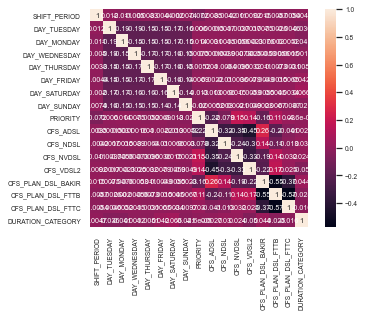

In [220]:
#Draw heatmap example
cm=features.corr(method="pearson")
sns.set(font_scale=0.6)
hm=sns.heatmap(cm, cbar=True,annot=True,square=True)

In [221]:
# set inputs and outputs
#x = features.iloc[:,0:14].values # all features
#x = features.iloc[:,0:6].values # RFC features
x = features.iloc[:,0:16].values # nominal or ordinal features
y = features.iloc[:,-1].values

In [222]:
# select K=4 best
#x = SelectKBest(chi2, k=4).fit_transform(x, y)
x[0,:]

array([2., 0., 0., 0., 0., 0., 1., 0., 2., 1., 0., 0., 0., 0., 1., 0.])

In [223]:
y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [224]:
# Split the data to training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=147)

In [225]:
# Print the number of instances in training & test set
x_train.shape

(55032, 16)

In [226]:
y_train.shape

(55032,)

In [227]:
x_test.shape

(13758, 16)

In [228]:
# StandardScaler
scaler=StandardScaler()

In [229]:
# scale train data
x_train_std=scaler.fit_transform(x_train)

In [230]:
x_train_std

array([[ 1.1260946 , -0.44026174, -0.43202809, ..., -0.60338131,
         1.09450406, -0.62071671],
       [ 1.1260946 , -0.44026174, -0.43202809, ..., -0.60338131,
         1.09450406, -0.62071671],
       [-0.56942491, -0.44026174, -0.43202809, ...,  1.65732677,
        -0.91365582, -0.62071671],
       ...,
       [-0.56942491, -0.44026174, -0.43202809, ..., -0.60338131,
        -0.91365582,  1.61104089],
       [-0.56942491, -0.44026174,  2.31466433, ..., -0.60338131,
         1.09450406, -0.62071671],
       [-0.56942491, -0.44026174, -0.43202809, ...,  1.65732677,
        -0.91365582, -0.62071671]])

In [231]:
# Scale each feature to range(0, 1)
x_test_std=scaler.transform(x_test)
x_test_std

array([[ 1.1260946 , -0.44026174, -0.43202809, ..., -0.60338131,
         1.09450406, -0.62071671],
       [-0.56942491, -0.44026174,  2.31466433, ..., -0.60338131,
         1.09450406, -0.62071671],
       [-0.56942491, -0.44026174, -0.43202809, ..., -0.60338131,
         1.09450406, -0.62071671],
       ...,
       [-0.56942491, -0.44026174, -0.43202809, ...,  1.65732677,
        -0.91365582, -0.62071671],
       [ 1.1260946 , -0.44026174, -0.43202809, ...,  1.65732677,
        -0.91365582, -0.62071671],
       [-0.56942491, -0.44026174, -0.43202809, ..., -0.60338131,
         1.09450406, -0.62071671]])

In [232]:
# Initialize the linear regression model
model=LinearRegression()

In [233]:
# Fit the training data to the model
model.fit(x_train_std, y_train)

LinearRegression()

In [234]:
model.coef_

array([ 2.55047562e-03, -1.51377440e+11, -1.49445490e+11, -1.47631966e+11,
       -1.44065597e+11, -1.43251262e+11, -1.38208739e+11, -1.29207533e+11,
        4.55940738e-03, -5.14718183e+11, -4.20775542e+11, -4.42499671e+11,
       -5.00120747e+11,  2.74372091e+11,  3.08877401e+11,  2.77931260e+11])

In [235]:
model.intercept_

0.287885421333295

In [236]:
# Print the general formula of our linear regression model
_str="y= "
for i, m in enumerate(model.coef_):
    _str += "x_{}*{}+".format(i+1,m)
_str += str(model.intercept_)
print(_str)

y= x_1*0.002550475618303377+x_2*-151377440054.81314+x_3*-149445490424.6993+x_4*-147631966205.4932+x_5*-144065597415.22498+x_6*-143251261736.9898+x_7*-138208739419.4785+x_8*-129207532833.54033+x_9*0.004559407384423849+x_10*-514718183233.22906+x_11*-420775541816.20105+x_12*-442499671257.0599+x_13*-500120746999.57587+x_14*274372090833.42264+x_15*308877401049.511+x_16*277931260392.47943+0.287885421333295


In [237]:
# Predict the values by using all test data
y_predict=model.predict(x_test_std)

#round predict
#y_predict=np.rint(y_predict)

In [238]:
# Print the predicted and the actual value of the data in test set
for i in range(len(y_test)):
    print("Predicted: ",y_predict[i]," Actual:", y_test[i])

Predicted:  0.327008956489545  Actual: 0
Predicted:  0.21079801898954498  Actual: 1
Predicted:  0.23771452289579498  Actual: 0
Predicted:  0.21598600727079498  Actual: 0
Predicted:  0.30964445453642  Actual: 0
Predicted:  0.21952604633329498  Actual: 0
Predicted:  0.308271163520795  Actual: 0
Predicted:  0.384076827583295  Actual: 1
Predicted:  0.329389327583295  Actual: 1
Predicted:  0.21079801898954498  Actual: 0
Predicted:  0.288984054145795  Actual: 1
Predicted:  0.259198897895795  Actual: 0
Predicted:  0.263227218208295  Actual: 0
Predicted:  0.21024870258329498  Actual: 0
Predicted:  0.23515104633329498  Actual: 1
Predicted:  0.20774626117704498  Actual: 0
Predicted:  0.280866378364545  Actual: 0
Predicted:  0.296918624458295  Actual: 0
Predicted:  0.285749190864545  Actual: 0
Predicted:  0.329389327583295  Actual: 0
Predicted:  0.255658858833295  Actual: 0
Predicted:  0.384809249458295  Actual: 0
Predicted:  0.273969405708295  Actual: 0
Predicted:  0.21079801898954498  Actual: 0

Predicted:  0.259443038520795  Actual: 0
Predicted:  0.24247526508329498  Actual: 0
Predicted:  0.260053390083295  Actual: 0
Predicted:  0.21861051898954498  Actual: 0
Predicted:  0.259443038520795  Actual: 0
Predicted:  0.23832487445829498  Actual: 0
Predicted:  0.325544112739545  Actual: 0
Predicted:  0.272748702583295  Actual: 0
Predicted:  0.299421065864545  Actual: 0
Predicted:  0.341718429145795  Actual: 1
Predicted:  0.280927413520795  Actual: 1
Predicted:  0.353315108833295  Actual: 1
Predicted:  0.24357389789579498  Actual: 1
Predicted:  0.280072921333295  Actual: 0
Predicted:  0.341718429145795  Actual: 0
Predicted:  0.267682784614545  Actual: 0
Predicted:  0.347699874458295  Actual: 1
Predicted:  0.23167204242704498  Actual: 0
Predicted:  0.303998702583295  Actual: 0
Predicted:  0.380048507270795  Actual: 1
Predicted:  0.21861051898954498  Actual: 0
Predicted:  0.298627608833295  Actual: 0
Predicted:  0.259504073677045  Actual: 0
Predicted:  0.296186202583295  Actual: 0
Pred

Predicted:  0.30512785297392  Actual: 1
Predicted:  0.264936202583295  Actual: 0
Predicted:  0.273481124458295  Actual: 0
Predicted:  0.335431808052045  Actual: 0
Predicted:  0.30805754047392  Actual: 1
Predicted:  0.292768233833295  Actual: 0
Predicted:  0.22312712055204498  Actual: 1
Predicted:  0.254316085395795  Actual: 0
Predicted:  0.294721358833295  Actual: 1
Predicted:  0.24064421039579498  Actual: 0
Predicted:  0.353315108833295  Actual: 0
Predicted:  0.24619840961454498  Actual: 1
Predicted:  0.250898116645795  Actual: 0
Predicted:  0.279584640083295  Actual: 0
Predicted:  0.301557296333295  Actual: 0
Predicted:  0.345990890083295  Actual: 0
Predicted:  0.343549483833295  Actual: 0
Predicted:  0.273786300239545  Actual: 0
Predicted:  0.255780929145795  Actual: 0
Predicted:  0.250898116645795  Actual: 0
Predicted:  0.260053390083295  Actual: 0
Predicted:  0.254071944770795  Actual: 1
Predicted:  0.322614425239545  Actual: 0
Predicted:  0.389997237739545  Actual: 0
Predicted:  

Predicted:  0.294721358833295  Actual: 1
Predicted:  0.267865890083295  Actual: 0
Predicted:  0.274213546333295  Actual: 0
Predicted:  0.308271163520795  Actual: 0
Predicted:  0.314008468208295  Actual: 0
Predicted:  0.21519255023954498  Actual: 0
Predicted:  0.311689132270795  Actual: 0
Predicted:  0.266095870552045  Actual: 0
Predicted:  0.294965499458295  Actual: 0
Predicted:  0.272992843208295  Actual: 1
Predicted:  0.384809249458295  Actual: 1
Predicted:  0.276593917427045  Actual: 1
Predicted:  0.250409835395795  Actual: 0
Predicted:  0.22660612445829498  Actual: 0
Predicted:  0.357648604927045  Actual: 1
Predicted:  0.414594405708295  Actual: 0
Predicted:  0.286115401802045  Actual: 1
Predicted:  0.22312712055204498  Actual: 0
Predicted:  0.21519255023954498  Actual: 0
Predicted:  0.250287765083295  Actual: 0
Predicted:  0.254071944770795  Actual: 1
Predicted:  0.23832487445829498  Actual: 1
Predicted:  0.24186491352079498  Actual: 1
Predicted:  0.30079435688017  Actual: 1
Predi

Predicted:  0.254438155708295  Actual: 0
Predicted:  0.278730147895795  Actual: 1
Predicted:  0.251630538520795  Actual: 1
Predicted:  0.307294601020795  Actual: 0
Predicted:  0.269025558052045  Actual: 0
Predicted:  0.22929167133329498  Actual: 0
Predicted:  0.21024870258329498  Actual: 0
Predicted:  0.308881515083295  Actual: 0
Predicted:  0.293927901802045  Actual: 0
Predicted:  0.320234054145795  Actual: 0
Predicted:  0.28895353656767  Actual: 1
Predicted:  0.387006515083295  Actual: 0
Predicted:  0.23710417133329498  Actual: 0
Predicted:  0.277265304145795  Actual: 0
Predicted:  0.30213713031767  Actual: 1
Predicted:  0.20628141742704498  Actual: 0
Predicted:  0.30079435688017  Actual: 1
Predicted:  0.338788741645795  Actual: 0
Predicted:  0.269086593208295  Actual: 0
Predicted:  0.308149093208295  Actual: 1
Predicted:  0.30079435688017  Actual: 0
Predicted:  0.268964522895795  Actual: 1
Predicted:  0.293134444770795  Actual: 0
Predicted:  0.290998214302045  Actual: 1
Predicted:  

Predicted:  0.258100265083295  Actual: 1
Predicted:  0.277753585395795  Actual: 0
Predicted:  0.256452315864545  Actual: 0
Predicted:  0.352460616645795  Actual: 0
Predicted:  0.21024870258329498  Actual: 0
Predicted:  0.353070968208295  Actual: 1
Predicted:  0.24064421039579498  Actual: 0
Predicted:  0.306440108833295  Actual: 0
Predicted:  0.312665694770795  Actual: 0
Predicted:  0.272992843208295  Actual: 0
Predicted:  0.387006515083295  Actual: 0
Predicted:  0.267682784614545  Actual: 0
Predicted:  0.299115890083295  Actual: 0
Predicted:  0.331525558052045  Actual: 1
Predicted:  0.22154020648954498  Actual: 1
Predicted:  0.334516280708295  Actual: 0
Predicted:  0.283002608833295  Actual: 0
Predicted:  0.258710616645795  Actual: 0
Predicted:  0.251264327583295  Actual: 0
Predicted:  0.258710616645795  Actual: 0
Predicted:  0.343549483833295  Actual: 1
Predicted:  0.389997237739545  Actual: 1
Predicted:  0.24735807758329498  Actual: 0
Predicted:  0.308454268989545  Actual: 1
Predicte

Predicted:  0.307050460395795  Actual: 0
Predicted:  0.264936202583295  Actual: 0
Predicted:  0.287091964302045  Actual: 0
Predicted:  0.22990202289579498  Actual: 0
Predicted:  0.22416471820829498  Actual: 0
Predicted:  0.356000655708295  Actual: 0
Predicted:  0.24772428852079498  Actual: 1
Predicted:  0.382673018989545  Actual: 0
Predicted:  0.275922530708295  Actual: 0
Predicted:  0.304364913520795  Actual: 0
Predicted:  0.30213713031767  Actual: 0
Predicted:  0.23588346820829498  Actual: 0
Predicted:  0.293256515083295  Actual: 0
Predicted:  0.30671476703642  Actual: 1
Predicted:  0.29627775531767  Actual: 1
Predicted:  0.255170577583295  Actual: 0
Predicted:  0.21928190570829498  Actual: 0
Predicted:  0.345990890083295  Actual: 0
Predicted:  0.335370772895795  Actual: 0
Predicted:  0.304181808052045  Actual: 0
Predicted:  0.22331022602079498  Actual: 0
Predicted:  0.300092452583295  Actual: 1
Predicted:  0.378095382270795  Actual: 0
Predicted:  0.275678390083295  Actual: 0
Predict

Predicted:  0.354657882270795  Actual: 0
Predicted:  0.21214079242704498  Actual: 0
Predicted:  0.303632491645795  Actual: 0
Predicted:  0.351850265083295  Actual: 0
Predicted:  0.383954757270795  Actual: 1
Predicted:  0.335859054145795  Actual: 0
Predicted:  0.21598600727079498  Actual: 0
Predicted:  0.294599288520795  Actual: 0
Predicted:  0.338910811958295  Actual: 0
Predicted:  0.279584640083295  Actual: 1
Predicted:  0.24589323383329498  Actual: 0
Predicted:  0.352399581489545  Actual: 0
Predicted:  0.23698210102079498  Actual: 1
Predicted:  0.251386397895795  Actual: 0
Predicted:  0.293988936958295  Actual: 0
Predicted:  0.21079801898954498  Actual: 0
Predicted:  0.266034835395795  Actual: 1
Predicted:  0.273481124458295  Actual: 0
Predicted:  0.327008956489545  Actual: 0
Predicted:  0.272077315864545  Actual: 0
Predicted:  0.290265792427045  Actual: 0
Predicted:  0.264692061958295  Actual: 0
Predicted:  0.258771651802045  Actual: 0
Predicted:  0.301557296333295  Actual: 1
Predic

Predicted:  0.323896163520795  Actual: 0
Predicted:  0.24296354633329498  Actual: 0
Predicted:  0.262250655708295  Actual: 1
Predicted:  0.342817061958295  Actual: 1
Predicted:  0.268354171333295  Actual: 1
Predicted:  0.21519255023954498  Actual: 0
Predicted:  0.299115890083295  Actual: 0
Predicted:  0.331525558052045  Actual: 0
Predicted:  0.294111007270795  Actual: 0
Predicted:  0.343549483833295  Actual: 0
Predicted:  0.21952604633329498  Actual: 1
Predicted:  0.300580733833295  Actual: 0
Predicted:  0.23698210102079498  Actual: 0
Predicted:  0.23771452289579498  Actual: 0
Predicted:  0.24589323383329498  Actual: 0
Predicted:  0.283002608833295  Actual: 0
Predicted:  0.385663741645795  Actual: 1
Predicted:  0.357648604927045  Actual: 1
Predicted:  0.320844405708295  Actual: 1
Predicted:  0.21800016742704498  Actual: 0
Predicted:  0.22385954242704498  Actual: 0
Predicted:  0.353315108833295  Actual: 0
Predicted:  0.22953581195829498  Actual: 0
Predicted:  0.21598600727079498  Actual

Predicted:  0.300580733833295  Actual: 0
Predicted:  0.290326827583295  Actual: 0
Predicted:  0.21024870258329498  Actual: 1
Predicted:  0.328534835395795  Actual: 1
Predicted:  0.267621749458295  Actual: 0
Predicted:  0.331464522895795  Actual: 0
Predicted:  0.262738936958295  Actual: 0
Predicted:  0.338544601020795  Actual: 0
Predicted:  0.295942061958295  Actual: 1
Predicted:  0.250776046333295  Actual: 0
Predicted:  0.298627608833295  Actual: 1
Predicted:  0.277997726020795  Actual: 0
Predicted:  0.346479171333295  Actual: 0
Predicted:  0.282270186958295  Actual: 0
Predicted:  0.344342940864545  Actual: 1
Predicted:  0.263471358833295  Actual: 0
Predicted:  0.356183761177045  Actual: 0
Predicted:  0.335920089302045  Actual: 0
Predicted:  0.341840499458295  Actual: 0
Predicted:  0.20628141742704498  Actual: 0
Predicted:  0.375531905708295  Actual: 0
Predicted:  0.22752165180204498  Actual: 0
Predicted:  0.20188688617704498  Actual: 0
Predicted:  0.385663741645795  Actual: 1
Predicte

Predicted:  0.320478194770795  Actual: 0
Predicted:  0.266401046333295  Actual: 1
Predicted:  0.290998214302045  Actual: 0
Predicted:  0.25642179828642  Actual: 0
Predicted:  0.290082686958295  Actual: 0
Predicted:  0.21421598773954498  Actual: 0
Predicted:  0.354657882270795  Actual: 1
Predicted:  0.22691130023954498  Actual: 0
Predicted:  0.383222335395795  Actual: 0
Predicted:  0.302045577583295  Actual: 0
Predicted:  0.255658858833295  Actual: 0
Predicted:  0.305524581489545  Actual: 0
Predicted:  0.267377608833295  Actual: 1
Predicted:  0.289716476020795  Actual: 1
Predicted:  0.311322921333295  Actual: 0
Predicted:  0.328534835395795  Actual: 0
Predicted:  0.278730147895795  Actual: 0
Predicted:  0.31397795063017  Actual: 1
Predicted:  0.357648604927045  Actual: 1
Predicted:  0.21659635883329498  Actual: 1
Predicted:  0.340558761177045  Actual: 0
Predicted:  0.305707686958295  Actual: 1
Predicted:  0.255170577583295  Actual: 0
Predicted:  0.306806319770795  Actual: 0
Predicted:  

Predicted:  0.24210905414579498  Actual: 0
Predicted:  0.21928190570829498  Actual: 0
Predicted:  0.299237960395795  Actual: 0
Predicted:  0.282270186958295  Actual: 0
Predicted:  0.258832686958295  Actual: 0
Predicted:  0.257367843208295  Actual: 1
Predicted:  0.347944015083295  Actual: 0
Predicted:  0.308393233833295  Actual: 0
Predicted:  0.23893522602079498  Actual: 0
Predicted:  0.258100265083295  Actual: 0
Predicted:  0.263959640083295  Actual: 1
Predicted:  0.24613737445829498  Actual: 0
Predicted:  0.21360563617704498  Actual: 0
Predicted:  0.263959640083295  Actual: 0
Predicted:  0.24772428852079498  Actual: 0
Predicted:  0.26374601703642  Actual: 0
Predicted:  0.21519255023954498  Actual: 0
Predicted:  0.23771452289579498  Actual: 0
Predicted:  0.376020186958295  Actual: 0
Predicted:  0.22550749164579498  Actual: 1
Predicted:  0.24699186664579498  Actual: 0
Predicted:  0.23545622211454498  Actual: 0
Predicted:  0.384076827583295  Actual: 0
Predicted:  0.259443038520795  Actua

Predicted:  0.352460616645795  Actual: 1
Predicted:  0.22990202289579498  Actual: 0
Predicted:  0.351728194770795  Actual: 0
Predicted:  0.263227218208295  Actual: 0
Predicted:  0.264936202583295  Actual: 1
Predicted:  0.326459640083295  Actual: 0
Predicted:  0.342817061958295  Actual: 1
Predicted:  0.356244796333295  Actual: 0
Predicted:  0.255170577583295  Actual: 1
Predicted:  0.23515104633329498  Actual: 0
Predicted:  0.283918136177045  Actual: 1
Predicted:  0.252607101020795  Actual: 0
Predicted:  0.22685026508329498  Actual: 0
Predicted:  0.330976241645795  Actual: 0
Predicted:  0.312055343208295  Actual: 0
Predicted:  0.293256515083295  Actual: 0
Predicted:  0.356733077583295  Actual: 1
Predicted:  0.21714567523954498  Actual: 0
Predicted:  0.271650069770795  Actual: 0
Predicted:  0.268354171333295  Actual: 1
Predicted:  0.271283858833295  Actual: 0
Predicted:  0.275922530708295  Actual: 0
Predicted:  0.292524093208295  Actual: 0
Predicted:  0.258710616645795  Actual: 1
Predicte

Predicted:  0.264692061958295  Actual: 1
Predicted:  0.22392057758329498  Actual: 0
Predicted:  0.30512785297392  Actual: 1
Predicted:  0.268354171333295  Actual: 1
Predicted:  0.23545622211454498  Actual: 1
Predicted:  0.279584640083295  Actual: 1
Predicted:  0.384809249458295  Actual: 1
Predicted:  0.293012374458295  Actual: 0
Predicted:  0.255170577583295  Actual: 0
Predicted:  0.283918136177045  Actual: 0
Predicted:  0.301557296333295  Actual: 0
Predicted:  0.318647140083295  Actual: 1
Predicted:  0.311139815864545  Actual: 0
Predicted:  0.352460616645795  Actual: 0
Predicted:  0.311689132270795  Actual: 0
Predicted:  0.314985030708295  Actual: 0
Predicted:  0.379682296333295  Actual: 0
Predicted:  0.303998702583295  Actual: 0
Predicted:  0.381025069770795  Actual: 1
Predicted:  0.262494796333295  Actual: 0
Predicted:  0.340009444770795  Actual: 0
Predicted:  0.263959640083295  Actual: 0
Predicted:  0.276532882270795  Actual: 0
Predicted:  0.314130538520795  Actual: 1
Predicted:  0

Predicted:  0.308759444770795  Actual: 0
Predicted:  0.303632491645795  Actual: 0
Predicted:  0.21659635883329498  Actual: 1
Predicted:  0.322980636177045  Actual: 0
Predicted:  0.319623702583295  Actual: 0
Predicted:  0.308759444770795  Actual: 0
Predicted:  0.381025069770795  Actual: 0
Predicted:  0.394208663520795  Actual: 1
Predicted:  0.20628141742704498  Actual: 0
Predicted:  0.276166671333295  Actual: 0
Predicted:  0.21714567523954498  Actual: 1
Predicted:  0.24210905414579498  Actual: 1
Predicted:  0.254316085395795  Actual: 0
Predicted:  0.270307296333295  Actual: 1
Predicted:  0.337690108833295  Actual: 0
Predicted:  0.280072921333295  Actual: 0
Predicted:  0.263959640083295  Actual: 1
Predicted:  0.23698210102079498  Actual: 0
Predicted:  0.269452804145795  Actual: 0
Predicted:  0.381879561958295  Actual: 0
Predicted:  0.23515104633329498  Actual: 0
Predicted:  0.366498702583295  Actual: 0
Predicted:  0.279584640083295  Actual: 0
Predicted:  0.278730147895795  Actual: 0
Pred

Predicted:  0.278608077583295  Actual: 1
Predicted:  0.21952604633329498  Actual: 0
Predicted:  0.262128585395795  Actual: 0
Predicted:  0.383222335395795  Actual: 1
Predicted:  0.259687179145795  Actual: 0
Predicted:  0.255658858833295  Actual: 0
Predicted:  0.24650358539579498  Actual: 0
Predicted:  0.299115890083295  Actual: 0
Predicted:  0.337445968208295  Actual: 0
Predicted:  0.279584640083295  Actual: 1
Predicted:  0.389936202583295  Actual: 1
Predicted:  0.304364913520795  Actual: 0
Predicted:  0.24613737445829498  Actual: 0
Predicted:  0.326459640083295  Actual: 0
Predicted:  0.21659635883329498  Actual: 0
Predicted:  0.267499679145795  Actual: 0
Predicted:  0.271894210395795  Actual: 0
Predicted:  0.23832487445829498  Actual: 1
Predicted:  0.277997726020795  Actual: 1
Predicted:  0.23759245258329498  Actual: 0
Predicted:  0.272016280708295  Actual: 1
Predicted:  0.266889327583295  Actual: 0
Predicted:  0.320234054145795  Actual: 0
Predicted:  0.275800460395795  Actual: 0
Pred

Predicted:  0.347882979927045  Actual: 0
Predicted:  0.296186202583295  Actual: 1
Predicted:  0.263959640083295  Actual: 1
Predicted:  0.282270186958295  Actual: 0
Predicted:  0.267682784614545  Actual: 0
Predicted:  0.347882979927045  Actual: 1
Predicted:  0.24003385883329498  Actual: 0
Predicted:  0.276166671333295  Actual: 0
Predicted:  0.259198897895795  Actual: 0
Predicted:  0.21024870258329498  Actual: 0
Predicted:  0.255780929145795  Actual: 0
Predicted:  0.303510421333295  Actual: 1
Predicted:  0.24619840961454498  Actual: 0
Predicted:  0.250898116645795  Actual: 0
Predicted:  0.31397795063017  Actual: 0
Predicted:  0.273969405708295  Actual: 1
Predicted:  0.21714567523954498  Actual: 0
Predicted:  0.286115401802045  Actual: 0
Predicted:  0.23759245258329498  Actual: 0
Predicted:  0.308149093208295  Actual: 0
Predicted:  0.22123503070829498  Actual: 0
Predicted:  0.23167204242704498  Actual: 0
Predicted:  0.250898116645795  Actual: 0
Predicted:  0.260053390083295  Actual: 0
Pre

Text(0, 0.5, 'Predictions')

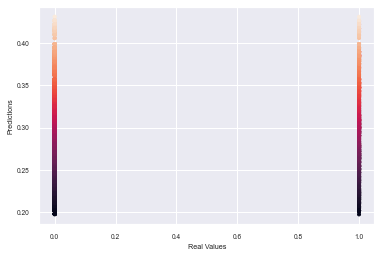

In [258]:
lineX=y_test
lineY=y_predict
plt.scatter(lineX, lineY, marker='.', c=lineY)
plt.xlabel("Real Values")
plt.ylabel("Predictions")

In [259]:
# Calculate the score of the model in test data
score=model.score(x_test_std,y_test)
print(score)

0.01536078310437139


In [260]:
# Calculate mean squared error of predicted values
mse=mean_squared_error(y_test,y_predict)
rmse = np.sqrt(mse)
print(mse)
print(rmse)
r2 = r2_score(y_test, y_predict)
print(r2)

0.20310255877839378
0.45066901244526875
0.01536078310437139


In [261]:
# Calculate absolute squared error of predicted values
mea=mean_absolute_error(y_test,y_predict)
print(mea)

0.4056152624656324


In [262]:
# Fitting  RandomForestClassifier to the dataset
# create  RandomForestClassifier object
rfClassifier = RandomForestClassifier(criterion='entropy', n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
rfClassifier.fit(x_train_std, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [263]:
# see feature_importance and use feature selection
# HOUR, DAY, MONTH, PRIOIRTY, CITY_CODE?, DIRECTOTATE_CODE? have high impontance
print(rfClassifier.feature_importances_)

[0.14125088 0.0182853  0.01800969 0.01684088 0.01464302 0.02650987
 0.03820032 0.01735667 0.49775042 0.04991929 0.0294774  0.03590927
 0.03563193 0.0250022  0.01860771 0.01660516]


In [264]:
features.columns

Index(['SHIFT_PERIOD', 'DAY_TUESDAY', 'DAY_MONDAY', 'DAY_WEDNESDAY',
       'DAY_THURSDAY', 'DAY_FRIDAY', 'DAY_SATURDAY', 'DAY_SUNDAY', 'PRIORITY',
       'CFS_ADSL', 'CFS_NDSL', 'CFS_NVDSL', 'CFS_VDSL2', 'CFS_PLAN_DSL_BAKIR',
       'CFS_PLAN_DSL_FTTB', 'CFS_PLAN_DSL_FTTC', 'DURATION_CATEGORY'],
      dtype='object')

In [265]:
# Predict the values by using all test data
y_predict= rfClassifier.predict(x_test_std)

In [266]:
rfClassifier.score(x_test_std, y_test)

# score with scaling, 0.7051897078063672, n=100
# score with scaling, 0.7083878470707952  n=1000
# score without scaling, 0.6999563890100305 n=100

# score RFC important features, 0.6817851431894171, n=100
# score select K=4 best features, 0.7047535979066725, n=100

0.719581334496293

In [267]:
# Print the predicted and the actual value of the data in test set
for i in range(len(y_test)):
    print("Predicted: ",y_predict[i]," Actual:", y_test[i])

Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  1  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  1  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  1  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  1  Actual: 1
Predicted:  0  Actual: 1
Predicted:  1  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  1  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  1  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  1  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  1  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  1  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 1
Predicted:  1  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  1  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  1  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  1  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  1  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  1  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 0
Predicted:  1  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  1  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  1  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  1  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  1  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  1  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  1  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  1  Actual: 0
Predicted:  1  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0


Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  1  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1


Text(0, 0.5, 'Predictions')

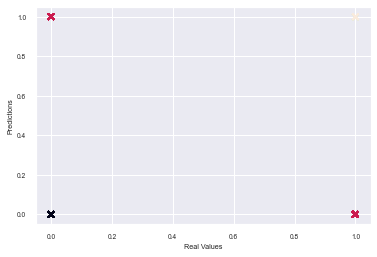

In [300]:
# false predictions in red colors
lineX=y_test
lineY=y_predict
plt.scatter(lineX, lineY, marker='x', c=lineX+lineY)
plt.xlabel("Real Values")
plt.ylabel("Predictions")

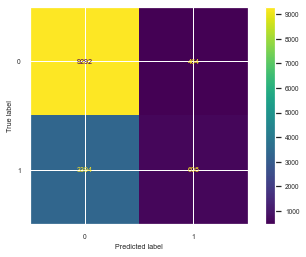

In [301]:
plot_confusion_matrix(rfClassifier,x_test_std,y_test)

In [302]:
# performance
target_names = ['SLA', 'Violation']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

         SLA       0.73      0.95      0.83      9756
   Violation       0.57      0.15      0.24      4002

    accuracy                           0.72     13758
   macro avg       0.65      0.55      0.53     13758
weighted avg       0.68      0.72      0.66     13758



In [303]:
# Calculate mean squared error of predicted values
mse=mean_squared_error(y_test,y_predict)
rmse = np.sqrt(mse)
print(mse)
print(rmse)
r2 = r2_score(y_test, y_predict)
print(r2)

0.2804186655037069
0.5295457161602829
-0.3594669454940427


In [304]:
# Calculate absolute squared error of predicted values
mea=mean_absolute_error(y_test,y_predict)
print(mea)

0.2804186655037069


In [305]:
# classification with support vektor machine
# training not complated without scaling
mysvc=SVC(kernel='linear', C=0.01, random_state=0) # linear, poly, rbf (gaussian), sigmoid, tried
# fit the SVC with x and y data
mysvc.fit(x_train_std, y_train)

SVC(C=0.01, kernel='linear', random_state=0)

In [309]:
# Predict the values by using all test data
y_predict= mysvc.predict(x_test_std)

In [310]:
# Calculate the score of the model in test data
score=mysvc.score(x_test_std,y_test)
print(score)

# with scaling data;
# linear score 0.7091146969036197, C=0.01, BEST SCORE
# linear score 0.7091146969036197, C=0.001
# linear score 0.7091146969036197, C=0.1
# poly score 0.7091146969036197, C=0.01
# rbf score 0.7091146969036197, C=0.01
# sigmoid score 0.6370111934874255, C=0.01

# linear, RFC features, C=0.01 score = 0.7091146969036197 
# linear, Select K=4 best features, C=0.01 score = 0.7091146969036197 

0.7091146969036197


In [311]:
accuracy_score(y_test, y_predict)

0.7091146969036197

In [312]:
# Print the predicted and the actual value of the data in test set
for i in range(len(y_test)):
    print("Predicted: ",y_predict[i]," Actual:", y_test[i])

Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1


Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1


Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0


Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1


Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 1
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0
Predicted:  0  Actual: 0


Text(0, 0.5, 'Predictions')

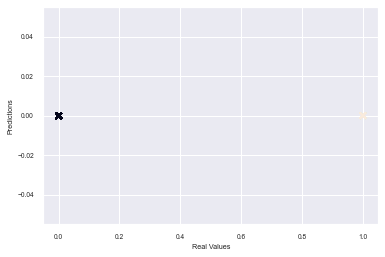

In [315]:
# false predictions 
lineX=y_test
lineY=y_predict
plt.scatter(lineX, lineY, marker='x', c=lineX+lineY)
plt.xlabel("Real Values")
plt.ylabel("Predictions")

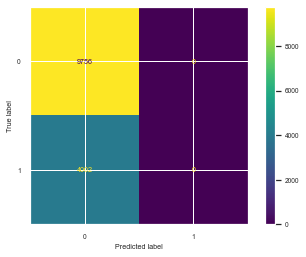

In [316]:
plot_confusion_matrix(mysvc,x_test_std,y_test)

In [317]:
# performances
target_names = ['SLA', 'Violation']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

         SLA       0.71      1.00      0.83      9756
   Violation       0.00      0.00      0.00      4002

    accuracy                           0.71     13758
   macro avg       0.35      0.50      0.41     13758
weighted avg       0.50      0.71      0.59     13758



T:\Umit\tools\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [318]:
# Calculate mean squared error of predicted values
mse=mean_squared_error(y_test,y_predict)
rmse = np.sqrt(mse)
print(mse)
print(rmse)
r2 = r2_score(y_test, y_predict)
print(r2)

0.2908853030963803
0.5393378376271966
-0.4102091020910208


In [319]:
# Calculate absolute squared error of predicted values
mea=mean_absolute_error(y_test,y_predict)
print(mea)

0.2908853030963803


In [320]:
# Classification with perceptron algorithm
# no important change when change eta0 or max_iter
# very low performance score 0.2908853030963803 without scaling
mypercept=Perceptron(eta0=0.1, max_iter=10000, random_state=0)

In [321]:
mypercept.fit(x_train_std,y_train)

Perceptron(eta0=0.1, max_iter=10000)

In [322]:
# Predict the values by using all test data
y_predict= mypercept.predict(x_test_std)

Text(0, 0.5, 'Predictions')

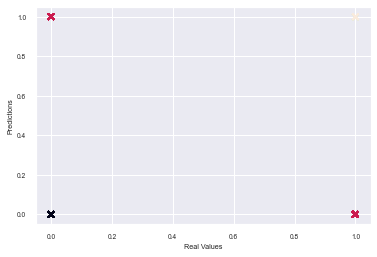

In [328]:
# false predictions 
lineX=y_test
lineY=y_predict
plt.scatter(lineX, lineY, marker='x', c=lineX+lineY)
plt.xlabel("Real Values")
plt.ylabel("Predictions")

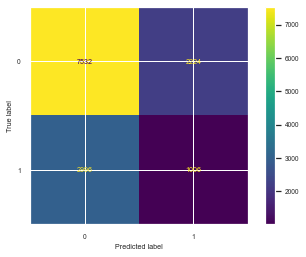

In [323]:
plot_confusion_matrix(mypercept,x_test_std,y_test)

In [324]:
# performances
target_names = ['SLA', 'Violation']
print(classification_report(y_test, y_predict, target_names=target_names))

              precision    recall  f1-score   support

         SLA       0.72      0.77      0.74      9756
   Violation       0.31      0.25      0.28      4002

    accuracy                           0.62     13758
   macro avg       0.51      0.51      0.51     13758
weighted avg       0.60      0.62      0.61     13758



In [325]:
accuracy_score(y_test, y_predict)

# 0.7086785870039249 with RFC features
# 0.6589620584387266 with all features
# 0.7091146969036197 with K=5 best features

0.620584387265591

In [329]:
# Calculate the score of the model in test data
score=mypercept.score(x_test_std,y_test)
print(score)

0.620584387265591


In [326]:
# Calculate mean squared error of predicted values
mse=mean_squared_error(y_test,y_predict)
rmse = np.sqrt(mse)
print(mse)
print(rmse)
r2 = r2_score(y_test, y_predict)
print(r2)

0.37941561273440905
0.6159672172562506
-0.8394031766404619


In [327]:
# Calculate absolute squared error of predicted values
mea=mean_absolute_error(y_test,y_predict)
print(mea)

0.37941561273440905
